# 🚗 Vehicle CO₂ Emissions Prediction using Deep Learning

## 📌 Project Overview
This project focuses on predicting **vehicle CO₂ emissions** using a **Deep Learning regression model** built with a fully connected neural network.  
The goal is to model the complex, non-linear relationships between vehicle characteristics and environmental impact.

In [ ]:

# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split


In [2]:
# Importing the dataset
data = pd.read_csv('co2_5.csv')

In [3]:
# Displaying the first few rows of the dataset
data.head()

,engine,cylandr,fuelcity,fuelwy,fuelcomb,out1
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


In [4]:
# Getting information about the dataset
data.describe()

,engine,cylandr,fuelcity,fuelwy,fuelcomb,out1
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,522.000000


In [5]:
# Checking for missing values and data types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   engine    7385 non-null   float64
 1   cylandr   7385 non-null   int64  
 2   fuelcity  7385 non-null   float64
 3   fuelwy    7385 non-null   float64
 4   fuelcomb  7385 non-null   float64
 5   out1      7385 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 346.3 KB


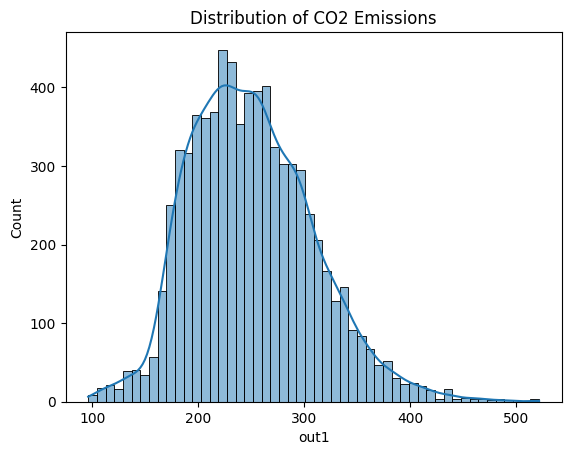

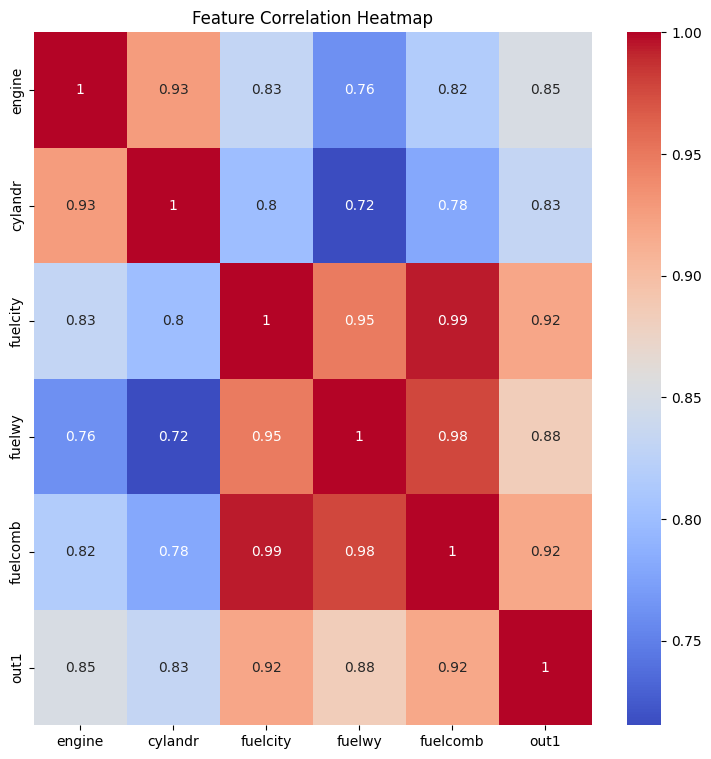

In [6]:
# Exploratory Data Analysis (EDA)


# Distribution of target variable
sns.histplot(data["out1"], kde=True)
plt.title("Distribution of CO2 Emissions")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [7]:
# Feature & Target Separation
x = data.drop("out1", axis=1).values
y = data["out1"].values

In [8]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print(x_train.shape, y_train.shape)

(5908, 5) (5908,)


In [27]:
# Now we create model 
model = Sequential()
model.add(Dense(55,input_dim = 5 , activation='relu'))
model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer='adam', metrics=['mean_squared_error'])

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 55)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            56 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 386 (1.51 KB)

 Trainable params: 386 (1.51 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# this code is not necessary 
# this is for visualizing the model
from keras_visualizer import visualizer


visualizer(model,file_name="mohammad",file_format='png')

In [ ]:
# Training the model
h = model.fit(x_train,y_train,epochs=500)

Epoch 1/500
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55726.3281 - mean_squared_error: 55726.3281
Epoch 2/500
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23611.7324 - mean_squared_error: 23611.7324
Epoch 3/500
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3236.4902 - mean_squared_error: 3236.4902
Epoch 4/500
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 588.5012 - mean_squared_error: 588.5012
Epoch 5/500
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 543.5267 - mean_squared_error: 543.5267
Epoch 6/500
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 542.3886 - mean_squared_error: 542.3886
Epoch 7/500
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 541.6210 - mean_squared_error: 541.6210
Epoch 8/500
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 540.5906 - mean_squared_error: 540.5906
Epoch 9/500
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 539.3337 - mean_squared_error: 539.3337
Epoch 10/500
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 538.4057 - mean_squ

In [ ]:
# Making Predictions
y_pred = model.predict(x_test)

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [20]:
print(y_pred)

[[255.5139 ]
 [342.72632]
 [327.84015]
 ...
 [183.90903]
 [240.22433]
 [193.459  ]]


In [15]:
print(y_test)

[253 344 322 ... 184 235 193]


In [25]:
test1 = np.array([[3.5,6,12.7,9.1,11.1]])

out1 = model.predict(test1)
print(out1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
[[260.21533]]


In [ ]:
# get the training history
history = h.history['loss']
print(history)

[55726.328125, 23611.732421875, 3236.490234375, 588.5011596679688, 543.5267333984375, 542.3886108398438, 541.6210327148438, 540.590576171875, 539.3336791992188, 538.4057006835938, 536.0682373046875, 534.6839599609375, 533.1109008789062, 531.8308715820312, 529.9190673828125, 527.7128295898438, 524.29150390625, 522.9448852539062, 520.0291748046875, 517.269775390625, 514.3523559570312, 511.5875549316406, 507.6705627441406, 505.4618225097656, 502.3143615722656, 498.57891845703125, 495.7434387207031, 492.1446838378906, 487.3467712402344, 486.0623779296875, 482.9295959472656, 478.36798095703125, 474.888671875, 472.8930358886719, 468.2580261230469, 466.1038513183594, 460.8807067871094, 456.75054931640625, 454.4087829589844, 450.34783935546875, 447.7117614746094, 443.4778137207031, 441.6208190917969, 438.3891906738281, 436.20513916015625, 430.8052978515625, 429.6845397949219, 424.5329284667969, 423.6033630371094, 419.6276550292969, 417.0750732421875, 415.1303405761719, 412.7692565917969, 409.7

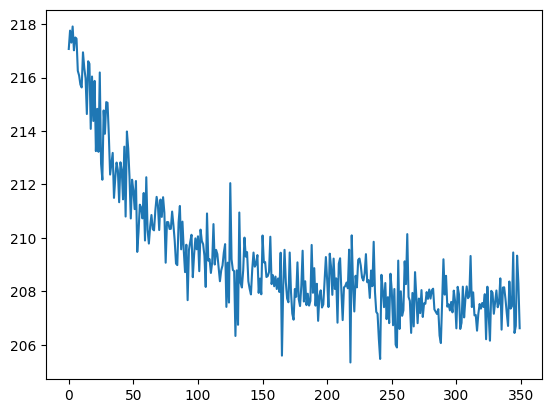

In [ ]:
# Plotting the training loss over epochs
er = h.history['loss']
er = er[150:]
plt.close()
plt.plot(er)
plt.show()

In [ ]:
## 👤 Author
# **Mohamad Nahvi**  
# Aspiring Data Scientist | Machine Learning & Deep Learning Enthusiast